In [24]:
import matplotlib as plt
import numpy as np
import pandas as pd
import re

from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import KFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [25]:
def inp():
    f = open("data.csv", "r")
    df = pd.read_csv(f)
    df.rename(columns={'Unnamed: 0': 'S_No'}, inplace=True)
    return df

In [26]:
df = inp()
print df.head()
print "Shape of dataframe is " + str(df.shape)
print df.columns.values

   S_No  categoryId                 channelId      channelTitle  \
0     0          24  UCMmVPVb0BwSIOWVeDwlPocQ  The United Stand   
1     1          17  UC5I8wkXUqqofJCde_rpAXgw   football times2   
2     2          17  UCiVg6vRhuyjsWgHkDNOig6A    BeanymanSports   
3     3          17  UCWUxVhaEPdJu98hNpSHNXZw        FootballTV   
4     4          22  UCQrlxwscx_mtWLFZg_bMGFg       Premierteam   

   channel_subscriber_count  channel_video_count  channel_view_count  \
0                     63697                  436            12786723   
1                       422                    0                6035   
2                    156825                 2302            99772688   
3                      1128                  143             1269543   
4                     23805                   32             4809173   

   commentCount definition                                        description  \
0         206.0         hd  Jose Mourinho wants Nemanja Matić to solve his...   
1 

In [27]:
print "definition" + str(pd.unique(df.definition.ravel()))
print "projection" + str(pd.unique(df.projection.ravel()))
print "live" + str(pd.unique(df.liveBroadcastContent.ravel()))
print "category" + str(pd.unique(df.categoryId.ravel()))
print "likes" + str(pd.unique(df.likeCount.ravel()))
print "comments" + str(pd.unique(df.commentCount.ravel()))
print "channel subscriber" + str(pd.unique(df.channel_subscriber_count.ravel()))
print "channel view" + str(pd.unique(df.channel_view_count.ravel()))
print "channel video" + str(pd.unique(df.channel_video_count.ravel()))
print "dislike" + str(pd.unique(df.dislikeCount.ravel()))
print "fave" + str(pd.unique(df.favoriteCount.ravel()))
print "view" + str(pd.unique(df.viewCount.ravel()))
print "privacy" + str(pd.unique(df.privacyStatus.ravel()))

definition['hd' 'sd']
projection['rectangular' nan '360']
live['none' 'live' nan]
category[24 17 22 20 27 23  1 10 43 25 26  2 28 29 19 15]
likes[   375.     77.    477. ...,    220.  31088.   1214.]
comments[   206.      0.    228. ...,   3529.  28038.   2381.]
channel subscriber[  63697     422  156825 ..., 3741502  585292   24418]
channel view[ 12786723      6035  99772688 ...,     21511 354141329  10673690]
channel video[   436      0   2302    143     32     59     30    133   1864   3885
   1251     16    211     67   2648      4    127    569    287     14
    111    380    141    155    102    499     80     50    137    189
   1898     43    154    698    783     86   1364     73     83      8
     93   1642     19     99    656    169     95    219   1700    167
    164     56     26     94   2428   2099     24    313    196     89
   3135    548     64    539    337   5692    110   6616     52  21009
    421   1190  11384   2140    827   1600     45      5    936   9629
    

In [28]:
df.apply(lambda x: sum(x.isnull()),axis=0)

S_No                          0
categoryId                    0
channelId                     0
channelTitle                  0
channel_subscriber_count      0
channel_video_count           0
channel_view_count            0
commentCount                 51
definition                    0
description                  77
dislikeCount                 14
duration                      2
favoriteCount                 2
likeCount                    14
liveBroadcastContent          2
localized                     2
privacyStatus                 2
projection                    2
publicStatsViewable           2
publishedAt                   2
tags                        189
title                         2
v_id                          2
viewCount                     2
title_hits                    0
timing                        0
dtype: int64

In [29]:
privacyOptions = ['public', 'private', 'unlisted', 'localized']
df.privacyStatus = df.privacyStatus.replace(to_replace=df.privacyStatus[~df.privacyStatus.isin(privacyOptions)], value='unlisted')
print "privacy" + str(pd.unique(df.privacyStatus.ravel()))

privacy['public' 'unlisted']


In [30]:
def_map_dict = {'hd':720, 'sd':240}
df.definition = df.definition.map(def_map_dict)

In [31]:
privacy_map_dict = {'public':3, 'unlisted':1, 'private': 0}
df.privacyStatus = df.privacyStatus.map(privacy_map_dict)

In [33]:
df['projection'].fillna('none', inplace=True)
print pd.unique(df.projection.ravel())
projection_dict = {'rectangular': 2, '360': 1, 'none': 0}
df.projection = df.projection.map(projection_dict)

['rectangular' 'none' '360']
[2 0 1]


In [34]:
df['liveBroadcastContent'].fillna('unspecified', inplace=True)
print pd.unique(df.liveBroadcastContent.ravel())
live_dict = {'live': 2, 'none': 1, 'unspecified': 0}
df.liveBroadcastContent = df.liveBroadcastContent.map(live_dict)
print pd.unique(df.liveBroadcastContent.ravel())

['none' 'live' 'unspecified']
[1 2 0]


In [35]:
%matplotlib inline

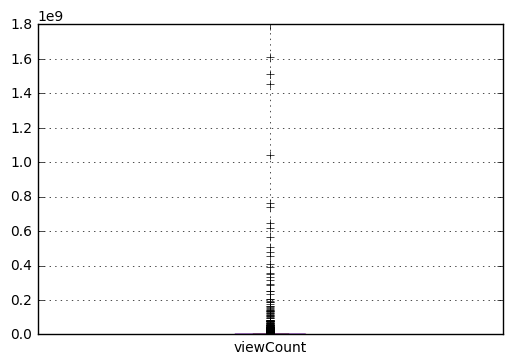

In [36]:
df.boxplot(column='viewCount')

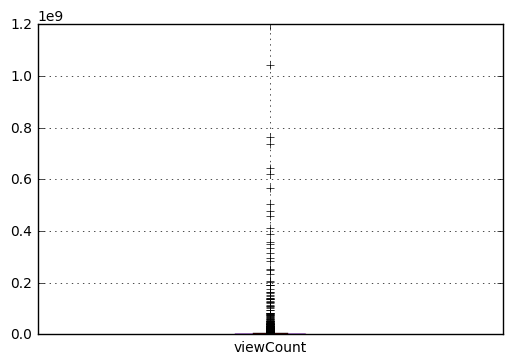

In [37]:
df = df.drop(df[df.viewCount > 1200000000].index)
df.boxplot(column='viewCount')

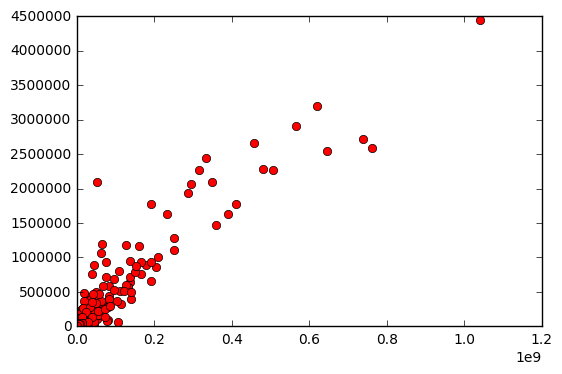

In [38]:
plt.pyplot.plot(df.viewCount.ravel(), df.likeCount.ravel(), "ro")

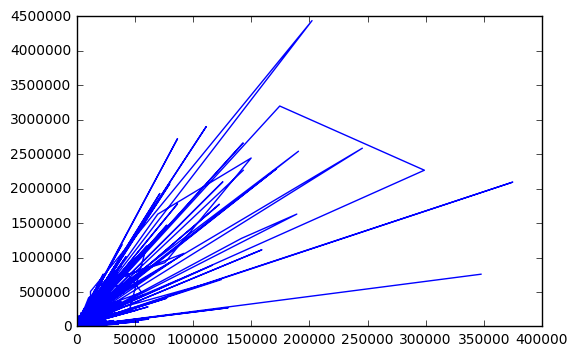

In [39]:
plt.pyplot.plot(df.commentCount.ravel(), df.likeCount.ravel())

In [40]:
df.dtypes

S_No                          int64
categoryId                    int64
channelId                    object
channelTitle                 object
channel_subscriber_count      int64
channel_video_count           int64
channel_view_count            int64
commentCount                float64
definition                    int64
description                  object
dislikeCount                float64
duration                     object
favoriteCount               float64
likeCount                   float64
liveBroadcastContent          int64
localized                    object
privacyStatus                 int64
projection                    int64
publicStatsViewable          object
publishedAt                  object
tags                         object
title                        object
v_id                         object
viewCount                   float64
title_hits                    int64
timing                        int64
dtype: object

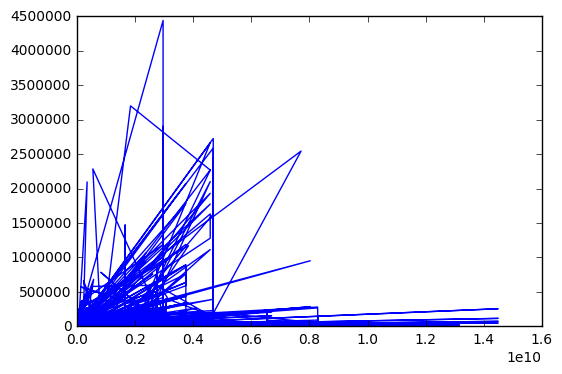

In [41]:
plt.pyplot.plot(df.channel_view_count.ravel(), df.likeCount.ravel())

In [42]:
print df.title.head()

0    Mourinho wants Matic! Plus Ashley Young to Chi...
1    [LIVE] MANCHESTER UNITED vs BORUSSIA DORTMUND ...
2    Manchester United 1-1 Liverpool - Jose Mourinh...
3    Phil Jones & Henrikh Mkhitaryan Interviews aft...
4    Zlatan Ibrahimovic ● All 20 Goals for MANCHEST...
Name: title, dtype: object


In [43]:
df.drop(['S_No', 'channelId', 'channelTitle', 'description', 'duration', 'localized', 'publicStatsViewable', 'publishedAt', 'tags', 'title', 'v_id'], axis=1, inplace=True)
print df.dtypes
print np.all(np.isfinite(df))

categoryId                    int64
channel_subscriber_count      int64
channel_video_count           int64
channel_view_count            int64
commentCount                float64
definition                    int64
dislikeCount                float64
favoriteCount               float64
likeCount                   float64
liveBroadcastContent          int64
privacyStatus                 int64
projection                    int64
viewCount                   float64
title_hits                    int64
timing                        int64
dtype: object
False


In [44]:
df[['categoryId','channel_subscriber_count', 'channel_view_count', 'channel_video_count', 'commentCount', 'definition', 'dislikeCount', 'favoriteCount', 'likeCount', 'liveBroadcastContent', 'privacyStatus', 'projection', 'viewCount', 'title_hits', 'timing']] = df[['categoryId','channel_subscriber_count', 'channel_view_count', 'channel_video_count', 'commentCount', 'definition', 'dislikeCount', 'favoriteCount', 'likeCount', 'liveBroadcastContent', 'privacyStatus', 'projection', 'viewCount', 'title_hits', 'timing']].astype(float)
print df.dtypes

categoryId                  float64
channel_subscriber_count    float64
channel_video_count         float64
channel_view_count          float64
commentCount                float64
definition                  float64
dislikeCount                float64
favoriteCount               float64
likeCount                   float64
liveBroadcastContent        float64
privacyStatus               float64
projection                  float64
viewCount                   float64
title_hits                  float64
timing                      float64
dtype: object


In [45]:
from sklearn import linear_model

def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors], data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print "Accuracy : %s" % "{0:.3%}".format(accuracy)
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))
    model.fit(data[predictors],data[outcome]) 

In [46]:
df = df[np.isfinite(df['likeCount'])]
df['commentCount'].fillna(0, inplace = True)
nan_rows = df[df.isnull().T.any().T]
print nan_rows

Empty DataFrame
Columns: [categoryId, channel_subscriber_count, channel_video_count, channel_view_count, commentCount, definition, dislikeCount, favoriteCount, likeCount, liveBroadcastContent, privacyStatus, projection, viewCount, title_hits, timing]
Index: []


In [48]:
df_to_np = {
    'categoryId': 0,
    'channel_subscriber_count': 1,
    'channel_video_count': 2,
    'channel_view_count': 3,
    'commentCount': 4,
    'definition': 5,
    'dislikeCount': 6,              
    'favoriteCount': 7,              
    'likeCount': 8,                   
    'liveBroadcastContent': 9,       
    'privacyStatus': 10,              
    'projection': 11,                  
    'viewCount': 12,                   
    'title_hits': 13,                  
    'timing': 14
}

In [49]:
npdata = df.as_matrix()

In [50]:
npdata[df_to_np['categoryId']]

array([  2.40000000e+01,   6.36970000e+04,   4.36000000e+02,
         1.27867230e+07,   2.06000000e+02,   7.20000000e+02,
         2.00000000e+01,   0.00000000e+00,   3.75000000e+02,
         1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
         9.47100000e+03,   1.36700000e+03,   4.11000000e+02])

In [52]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.cross_validation import KFold

y = npdata[:,8]
X = np.delete(npdata, np.s_[8:9], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = LinearRegression()
model.fit(X_train, y_train)
predicted_likes = model.predict(X_test)
print predicted_likes.shape
accuracy = r2_score(y_test.ravel(), predicted_likes.ravel())
kfmodel = KFold(X.shape[0], n_folds=6)
max_accuracy = 0
trindex, teindex = 0, 0
best = []
for train_index, test_index in kfmodel:
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    predicted_likes = model.predict(X_test)
    accuracy = r2_score(y_test.ravel(), predicted_likes.ravel())
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        trindex, teindex = train_index, test_index
        best = model.coef_
print max_accuracy
print trindex, teindex
print best

(507,)
0.965948519147
[   0    1    2 ..., 2530 2531 2532] [1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281
 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296
 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311
 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326
 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341
 1342 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356
 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371
 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386
 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401
 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416
 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431
 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446
 1447 1448 1449 1450 1451 145

In [62]:
def print_weights(model, df_to_np):
    print str(df_to_np.keys()[:8]) + str(df_to_np.keys()[9:]) + " " + str(best)

In [63]:
print_weights(model, df_to_np)

['projection', 'dislikeCount', 'viewCount', 'privacyStatus', 'likeCount', 'commentCount', 'timing', 'title_hits']['channel_subscriber_count', 'channel_video_count', 'channel_view_count', 'liveBroadcastContent', 'favoriteCount', 'categoryId'] [ -9.94336433e+02   8.89739374e-03   6.18503767e-02  -1.20118543e-05
   3.46411630e+00   4.23394504e+00  -6.86967121e-01   4.97289541e-10
   4.44683353e+03   9.92412369e-11   1.34545232e+03   3.64850250e-03
  -3.82210770e-02  -8.76879627e-01]


In [69]:
X_train, X_test = X[trindex], X[teindex]
y_train, y_test = y[trindex], y[teindex]
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
prediction_of_likes = model.predict(X_test)
error_in_likes = (prediction_of_likes - y_test)/100
print error_in_likes

[ -2.70141903e+01  -7.12323117e+01   1.58882807e+02   1.28435442e+02
  -4.28010181e+01   1.47293126e+02  -3.00786287e+01  -1.03777102e+01
   3.71922170e+02  -1.94380455e+03   1.35757201e+02  -3.75461313e+02
   1.68391447e+02  -1.99008832e+02  -4.57913709e+01  -1.82514404e+01
  -3.04090042e+01   1.97276772e+02   1.17111529e+02   4.25622962e+02
  -8.84087077e+01   7.86110227e+01   3.66519425e+02   4.69577773e+01
  -2.48971182e+01  -1.26416281e+02  -4.24372718e+00  -6.02185100e+01
   5.43731102e+01   3.08454948e+02  -3.58748147e+01  -8.92770540e+00
  -4.15418761e+01  -2.30021344e+01  -2.97658132e+01  -1.60276061e+01
  -3.82652907e+01   1.31070544e+03  -2.64074284e+01  -6.16297370e+01
   3.44591754e+02  -1.45120321e+02   3.48692380e+02  -5.18305023e+01
  -2.80298930e+01  -2.71302398e+01   4.43588289e+02  -2.69388827e+01
   1.30438566e+02   1.34022573e+02  -7.26756286e+00  -3.22219472e+01
   4.04583591e+01  -7.28440281e+00  -3.23623814e+01   5.50012683e+01
  -2.88837629e+01  -9.64233641e+01

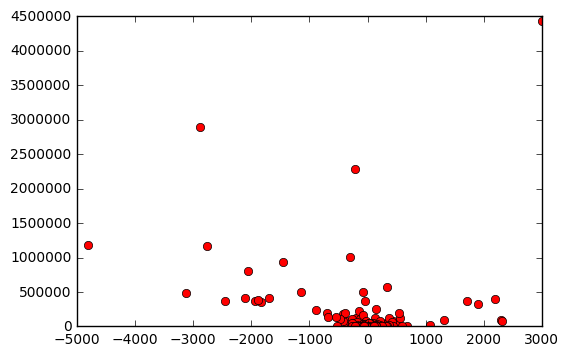

In [77]:
np.sort(y, axis=0)
plt.pyplot.plot(error_in_likes, y[teindex], "ro")